# 🚢 Titanic Dataset Project - Exploratory Data Analysis (EDA)

**Name:** Shirleen Simon  
**Date:** May 31, 2025

## 📘 What is EDA?

**Exploratory Data Analysis (EDA)** is the process of analyzing datasets to summarize their main characteristics, often using visual methods. It helps in understanding the structure of the data, detecting anomalies, identifying patterns, and checking assumptions before applying any machine learning models.

This notebook presents a comprehensive Exploratory Data Analysis (EDA) on the Titanic dataset. The aim is to understand how different features such as age, sex, class are related to the likelihood of survival.

### 🎯 Goals:
- Initial exploration of the data
- Handling missing values and outliers
- Univariate analysis
- Bivariate analysis
- Multivariate analysis
- Analyze and visualize the `Survived` target variable


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8-muted")

# Load dataset
df = pd.read_csv('/kaggle/input/titanic/train.csv')

# Preview
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 1: _Data Exploration_

Helps one understand-How your dataset is structured,What types of values you're dealing with and where there might be missing data, duplicates, or potential problems.

 

**Key Questions to Ask:**
- What does the dataset look like?
- How many features (columns) and records (rows) are there?
- What data types do the columns have?
- Are there any missing values or duplicates?
- Are there any obvious errors (like typos, outliers, or negative values)?

 **Key Functions for Initial Exploration**

  
Here are some essential pandas functions used for initial exploration:

- df.head(): Displays the first few rows of the dataset to give you a quick preview.
- df.shape: Returns the number of rows and columns in the dataset.
- df.info(): Provides details about the columns, their data types, and the number of non-null (non-missing) values.
- df.describe(): Provides summary statistics (mean, median, min, max, etc.) for numerical columns.
- df.columns: Lists the names of all columns in the dataset.
- df.nunique(): Returns the number of unique values in each column.
- df.duplicated(): Checks for duplicate rows.

In [2]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (891, 12)


In [3]:
# Data types and non-null counts
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Summary statistics for numerical features
print("\nSummary statistics:")
df.describe()


Summary statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Column names
print("\nColumn names:", df.columns.tolist())


Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [6]:
# Number of unique values per column
print("\nUnique values per column:")
print(df.nunique())


Unique values per column:
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [7]:
# Number of missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


## 🔍 Summary/Observations

- The dataset contains **891 rows** and **12 columns**.
- There are **no duplicate rows** in the dataset.
- The target variable is **`Survived`**, which is binary (0 = did not survive, 1 = survived).
- **Missing values** were found in the following columns:
  - `Age`: 177 missing values (~20%)
  - `Cabin`: 687 missing values (~77%) — this is a large portion of the data
  - `Embarked`: 2 missing values
- Columns such as `PassengerId`, `Name`, and `Ticket` have many unique values and may not be directly useful for prediction.
- The dataset includes a mix of data types:
  - **Numerical:** `Age`, `Fare`, `SibSp`, `Parch`
  - **Categorical:** `Sex`, `Pclass`, `Embarked`, `Cabin`
- Features like `Fare` and `Age` will be explored for potential **outliers**.
- The dataset is **well-structured**, with consistent data types and no duplicate records.


# Step 2: _Handling Missing Values and Outliers_

Handling missing values and outliers is a key part of cleaning the dataset before deeper analysis.

### 🔸 Missing Values:
Missing data can bias results or reduce model accuracy. Common strategies include:
- **Dropping rows or columns** with too much missing data
- **Imputing** missing values (e.g., using the mean, median, or mode)
- **Leaving them** if the model or context allows

### 🔸 Outliers:
Outliers are values that differ significantly from other observations. They may indicate variability or data entry errors. Handling methods include:
- **Removing** them
- **Capping** (setting a max/min threshold)
- **Imputing or transforming** them

We will now handle missing values for `Age`, `Cabin`, and `Embarked`, and check for outliers in `Fare` and `Age`.


In [9]:
# Checking missing values again
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [11]:
# Fill missing Embarked with the most frequent value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [12]:
# Drop Cabin column (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

In [13]:
# Check again after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## ✅ Summary of how I handled Missing Values

- **Age:** Filled 177 missing values using the **median** age, which helps avoid distortion from outliers.
- **Embarked:** Filled 2 missing values with the **mode** (most frequent embarkation point).
- **Cabin:** Dropped the `Cabin` column entirely due to a high proportion of missing values (687 out of 891 rows ≈ 77%).

✅ Now the dataset has **no missing values remaining**.


# Step 3: _Univariate Analysis_

Univariate analysis focuses on analyzing **one variable at a time**. This helps us understand:

- The distribution of numerical features (e.g., Age, Fare)
- The frequency of categories in categorical features (e.g., Sex, Pclass, Embarked)
- Potential skewness, outliers, or unusual values
- Whether transformations (e.g., log, bins) are needed

**What to do** :Explore both **numerical** and **categorical** variables in the dataset using visualizations and descriptive statistics.


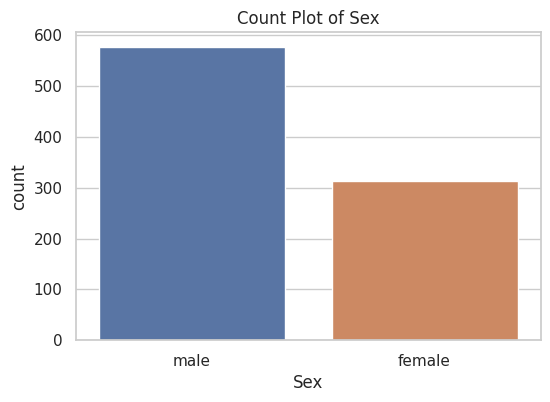

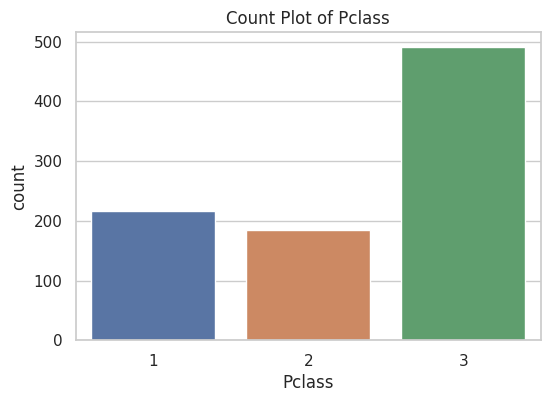

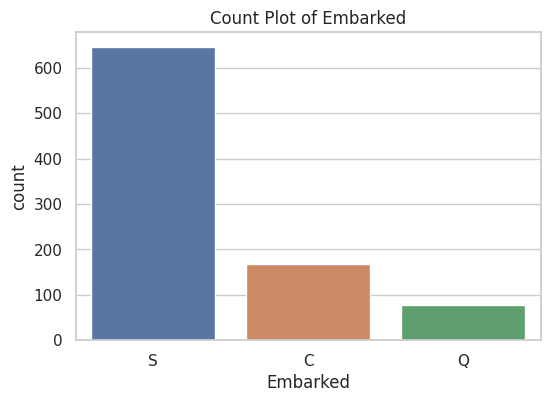

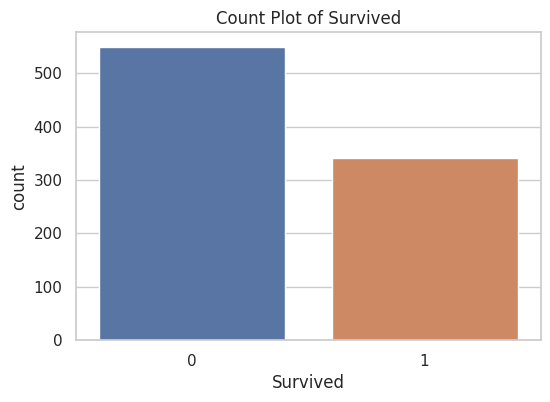

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot categorical features
categorical_features = ['Sex', 'Pclass', 'Embarked', 'Survived']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count Plot of {feature}')
    plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


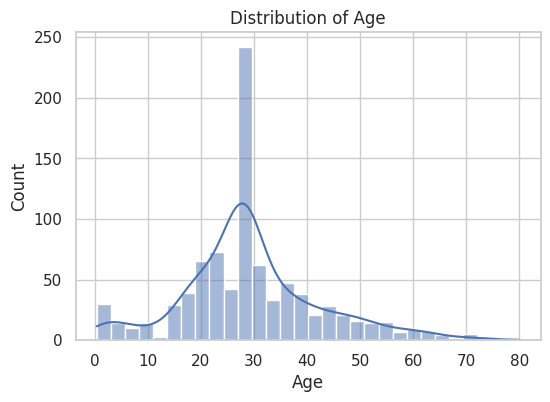

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


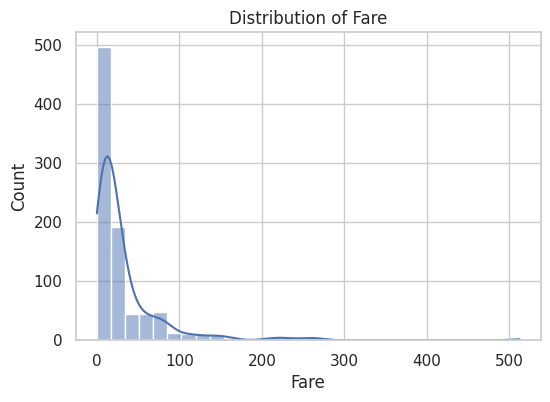

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Clean potential inf values
df['Age'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Fare'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot numerical features
numerical_features = ['Age', 'Fare']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()



  ## 🔍Summary/Observations

- **Sex:** The dataset has more male passengers than female.
- **Pclass:** Most passengers are in 3rd class.
- **Embarked:** Majority embarked from port 'S' (Southampton).
- **Survived:** More people did not survive (0) than survived (1).
- **Age:** Distribution is right-skewed with a peak around 20–30 years.
- **Fare:** Heavily right-skewed since the curve is not symmetrical — the "tail" is dragging to the right,also there’s a long tail stretching to the right, indicating a few passengers paid very high fares- few very high fares could be outliers.Lastly,The majority of passengers paid a low fare (clustered around 0–50).
  
  A **right-skewed** distribution (also called positively skewed) is a data distribution where most of the values are concentrated on the left (lower values)and a few larger values stretch the tail to the right.


# Step 4: _Bivariate Analysis_

Bivariate analysis explores the relationship between two variables. This step helps us understand patterns or associations between features — for example, how gender affects survival, or how passenger class relates to fare price.

**Key Questions to Explore:**
- Does the **Fare** vary with **Pclass**?
- Are **women or men** more likely to survive?
- Do **younger passengers** have higher survival chances?
- Does the **Embarked location** affect survival rate?

**Key Plots Used:**
- Bar plots
- Box plots
- Count plots (for categorical comparisons)


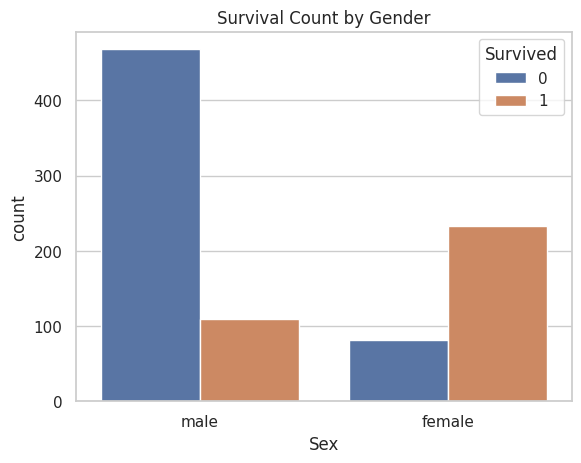

In [16]:
# Gender vs Survival
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()

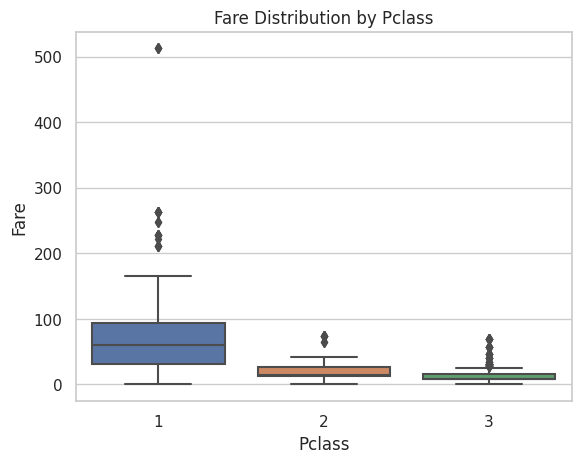

In [17]:
# Pclass vs Fare (Boxplot to compare distributions)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


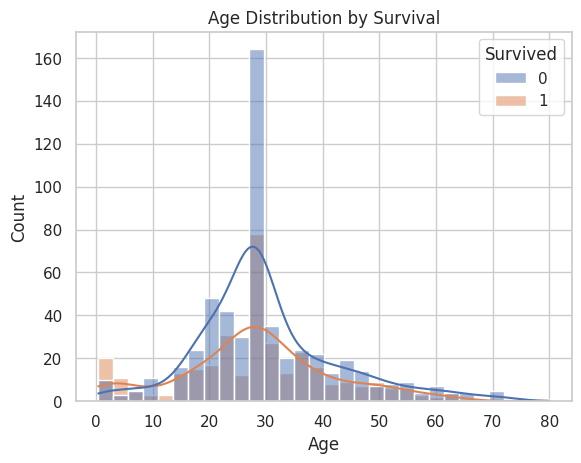

In [18]:
# Age vs Survival (using a histogram with hue)
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.show()

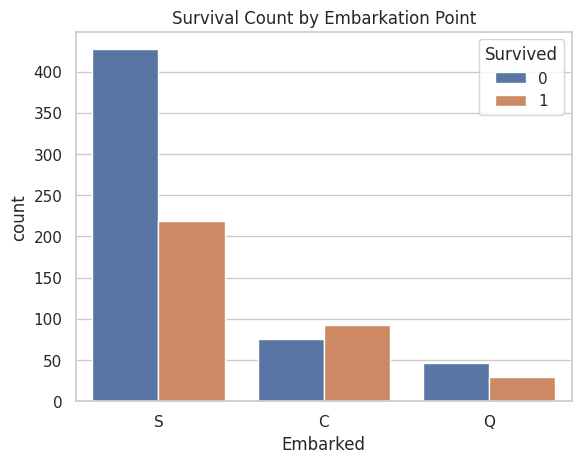

In [19]:
# Embarked vs Survival
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarkation Point')
plt.show()

## 🔍Summary/Observations

In this section, I explored how pairs of features relate to each other, particularly in relation to the target variable: **Survived**.

### a. **Gender vs Survival**
- The plot shows a clear disparity between genders.
- **Females had a significantly higher survival rate** than males.
- This aligns with historical accounts of evacuation protocols-women and children first.

---

### b. **Passenger Class (Pclass) vs Fare**
- The boxplot reveals that **1st class passengers paid the highest fares** on average.
- There is also greater variability in fares among 1st class passengers.
- This suggests a link between socioeconomic status and fare price, potentially influencing survival chances.

---

### c. **Age vs Survival**
- The histogram indicates that **younger passengers, especially children**, had a higher chance of survival.
- However, the overall survival trend across age groups is not linear.
- The KDE curve adds clarity to how age distributions differ between survivors and non-survivors.

---

### d. **Embarked vs Survival**
- Passengers who embarked from **Cherbourg (C)** had the highest survival rate.
- Those from **Southampton (S)** had lower survival rates.
- This might be related to a higher proportion of 1st class passengers boarding at Cherbourg.

---


# Step 5: _Multivariate Analysis_

This involves examining three or more variables simultaneously to understand the combined effects they may have on one another. 
It is an important step when we want to uncover complex patterns or interactions that may not be visible when analyzing individual or paired variables alone.

In the context of the Titanic dataset, this helps us explore how combinations of features—such as Age, Fare, Pclass, Sex, and Embarked—jointly influence survival outcomes.

This can help answer complex questions, such as:

- How do Pclass, Age, and Fare jointly affect survival?
- Are survival rates different for Embarked locations when considering Pclass?

By using visualizations like scatter plots and count plots, we can gain deeper insights into how multiple factors interact and impact the target variable (Survived).


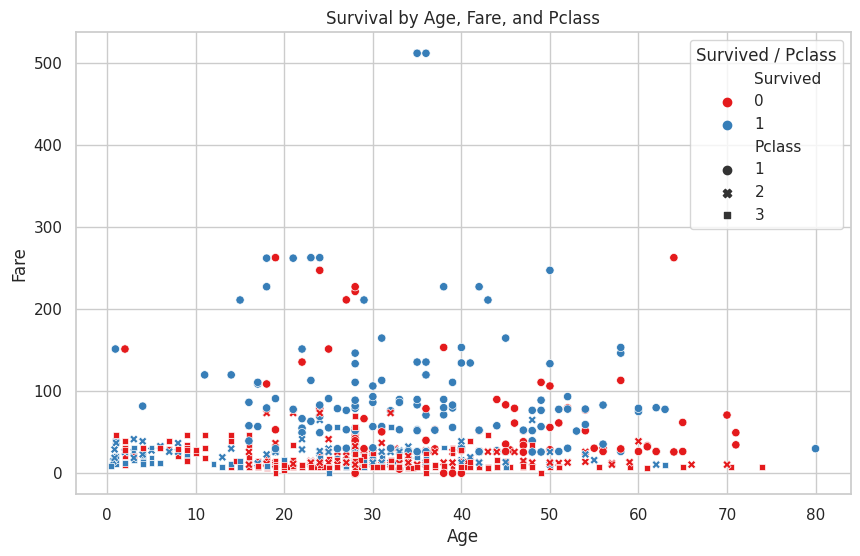

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Age vs Fare with Survived and Pclass
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', style='Pclass', palette='Set1')
plt.title('Survival by Age, Fare, and Pclass')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived / Pclass')
plt.show()

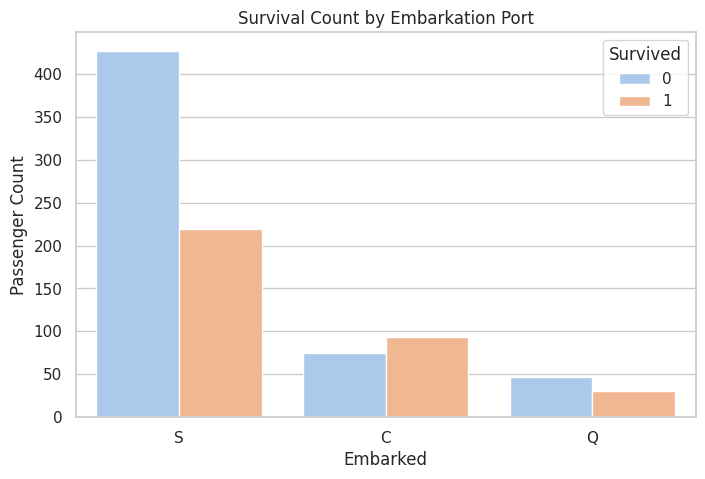

In [21]:
# Plot 2: Embarked vs Survival with hue as Survived
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='pastel')
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('Passenger Count')
plt.show()

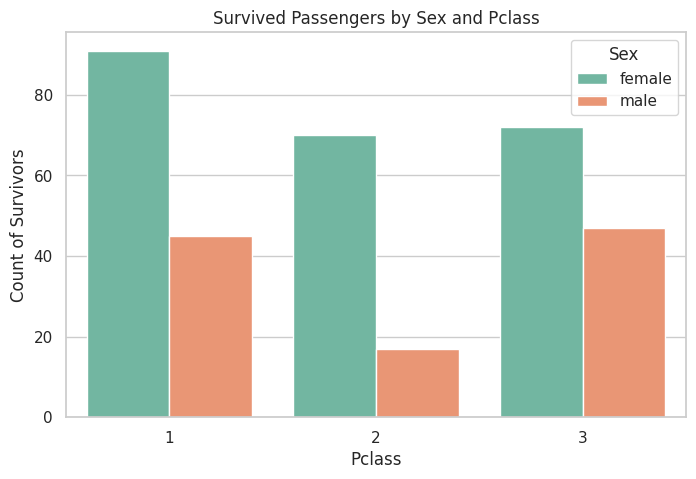

In [22]:
# Plot 3: Pclass vs Sex for only Survived passengers
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Sex', data=df[df['Survived'] == 1], palette='Set2')
plt.title('Survived Passengers by Sex and Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count of Survivors')
plt.show()

## 🔍 Summary/Observations

Here is what I observed in each plot:

### a. Age, Fare, and Pclass vs Survival
- Most survivors were younger and paid higher fares.
- Many of these passengers belonged to Pclass 1, suggesting wealth and class were key survival factors.
- There’s a noticeable cluster of higher-fare survivors around ages 20–40.

### b. Embarked and Pclass vs Survival
- Passengers who embarked from Cherbourg (C) had higher survival rates—likely because many were in 1st class.
- Those from Southampton (S) had lower survival, possibly due to a larger number of 3rd class passengers.
- This shows Embarked and Pclass combined played a role in survival chances.

### c. Sex and Pclass among Survivors
- Among survivors, females dominated every class—especially 1st and 2nd class.
- Very few males survived in 3rd class, highlighting how gender and class together influenced survival.

The plots confirm that survival on the Titanic was affected by a mix of age, fare, class, sex, and embarkation point—not just any single factor alone.


# Step 6: _Target Variable Analysis_
The target variable in the Titanic dataset is **Survived**. It indicates whether a passenger survived (1) or not (0).

**The goal** is to:
- Understand the distribution of the target variable
- Check for class imbalance
- Analyze how survival correlates with other key features
- Detecting interaction effects

### Target Variable Distribution

First analyze the distribution of the target variable, Survived. 
It is a binary variable that tells us whether a passenger survived (1) or did not survive (0). Understanding its balance helps inform modeling strategies.


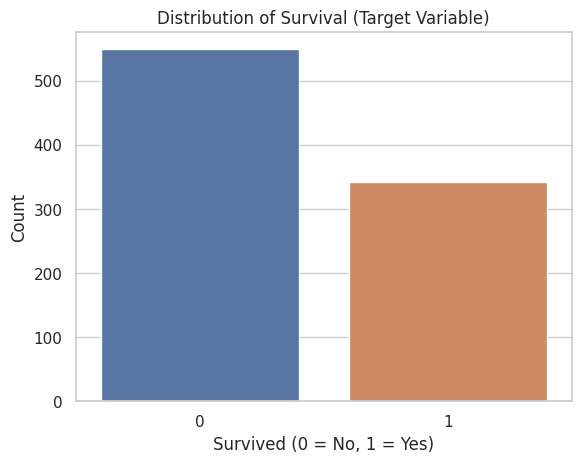

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival (Target Variable)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### Is the dataset balanced?

A balanced dataset means classes have almost equal instances.
We will check the proportion of survivors to non-survivors.


In [24]:
survival_counts = df['Survived'].value_counts(normalize=True)
print(survival_counts)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


The data set is moderately imbalanced.

### Target Variable vs. Key Features
How survival relates to Sex, Pclass, Age, and Embarked

**Survival by Gender:**

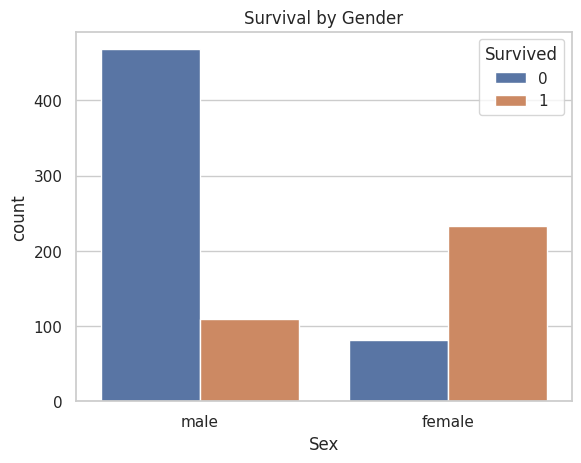

In [25]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

**Survival by Passenger Class:**

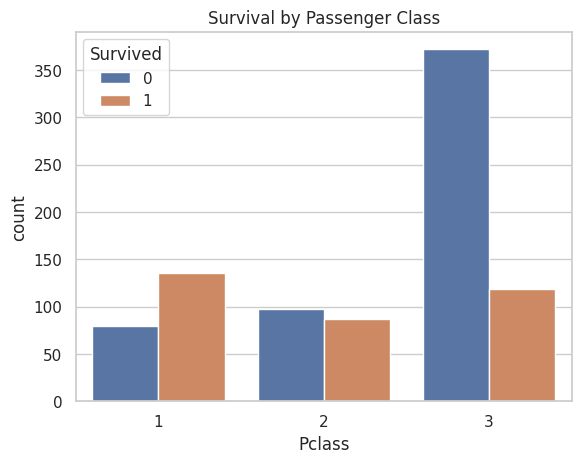

In [26]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

**Survival by Embarkation Point:**

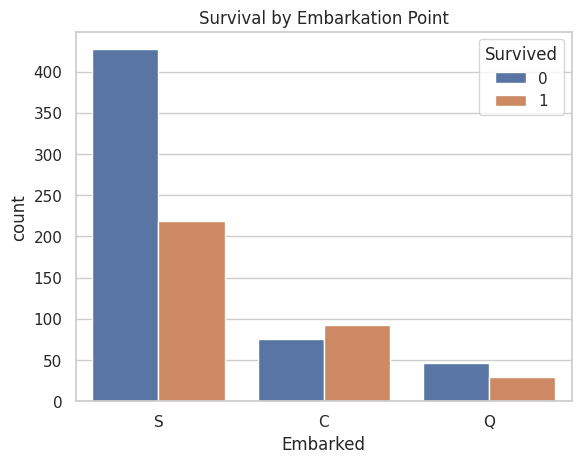

In [27]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Point')
plt.show()

**Survival by Age (Histogram):**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


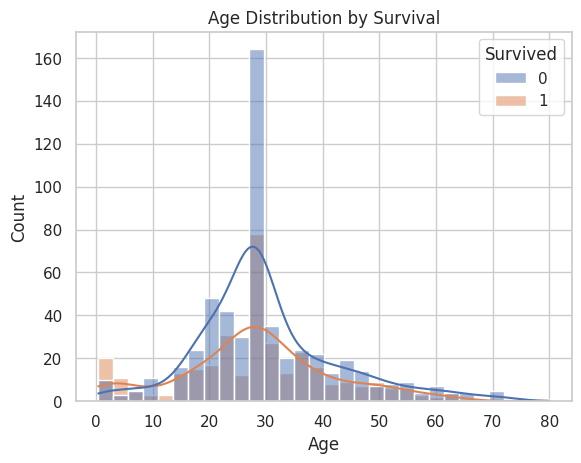

In [28]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.show()

## 🔍Summary/Observations

- Females had a much higher survival rate than males.
- Passengers in higher classes (Pclass 1) were more likely to survive.
- Embarked location seems to affect survival, with some ports showing higher survival.
- Younger passengers had slightly better chances of survival.

These suggests that survival was influenced by socio-economic status, gender, and age.


##  Exploratory Data Analysis Summary

---
The steps followed:

### 1️⃣ Initial Data Exploration

Examined the structure of the dataset using functions like `df.head()`, `df.info()`, `df.describe()`, and `df.isnull().sum()`. This helped to understand:

- The number of rows and columns.
- The types of features (categorical or numerical).
- Which columns had missing values.
- Basic statistical summaries (mean, median, etc.).
- Number of duplicate rows and unique values per column.

---

### 2️⃣ Handling Missing Values and Outliers

- Age had missing values, which I filled with the median.
- Embarked had a few missing values, replaced with the mode.
- Cabin had too many missing values and was dropped.
- Outliers in the Fare column were noted, with a right-skewed distribution. Outliers not removed to retain valuable data.

---

### 3️⃣ Univariate Analysis

Explored each variable individually:

- Age: Right-skewed — more younger passengers.
- Fare: Right-skewed — most paid low fares, few paid high.
- Embarked: Majority boarded at port S.
- Survived: Dataset was slightly imbalanced.

Used histograms, countplots, and boxplots for visualization.

---

### 4️⃣ Bivariate Analysis

Analyzed relationships between two variables:

- Female passengers had higher survival rates.
- 1st class passengers survived more than 2nd or 3rd class.
- Younger passengers had better survival chances.
- Embarked location showed survival patterns.

Visualizations: countplots, boxplots, histograms with `hue='Survived'`.

---

### 5️⃣ Multivariate Analysis

Looked at interactions among three or more variables:

- Age, Fare, and Pclass jointly influenced survival.
- 1st class passengers who were younger and paid higher fares had better chances.
- Embarked location showed different survival patterns depending on passenger class.

Used scatter plots and combined bar charts for deeper insights.

---

### 6️⃣ Target Variable Analysis

Examined the Survived column directly:

- About 38% survived, 62% did not.
- Higher survival rates were observed for:
  - Women
  - 1st class ticket holders
  - Passengers who paid higher fares
  - Younger individuals

---

## Conclusion

In this Exploratory Data Analysis (EDA), I explored the Titanic dataset to uncover patterns related to passenger survival. By cleaning missing data and analyzing distributions and relationships, I identified key factors affecting survival outcomes.

This process helped me understand which variables are most influential and laid a strong foundation for building predictive models in future steps.

---

## Key Takeaways

- Gender: Females had significantly higher survival rates.
- Pclass: 1st class passengers were more likely to survive.
- Age: Younger passengers (especially children) had better survival chances.
- Embarked: Survival rates varied by boarding location, especially when class was considered.
- Fare: Passengers who paid more generally had better survival odds, reflecting class differences.

These insights tell a clear story about survival on the Titanic and show the power of exploratory data analysis.
